In [1]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
# 군집 알고리즘 연습을 위한 예제 데이터 생성
x = np.c_[[4, 20, 3, 19, 17, 8, 19, 18, 8, 3, 19, 18],
         [15, 13, 13, 4, 17, 11, 12, 6, 10, 15, 14, 5]]
x_df = pd.DataFrame(x, columns=['experience', 'violation'])
x_df

,experience,violation
0,4,15
1,20,13
2,3,13
3,19,4
4,17,17
5,8,11
6,19,12
7,18,6
8,8,10
9,3,15


## DBSCAN
- 파라미터: 반지름, Min Points

<img src="그림파일/DBSCAN.png" width="300" height="300">

## DBSCAN 예제

<img src="그림파일/DBSCAN_example.png" width="500" height="500">

In [3]:
# 파라미터 설정
eps = 4
min_samples = 3

In [4]:
?DBSCAN

In [4]:
# DBSCAN 군집화 알고리즘 실행
db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)

# core sample들의 indicator
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db.labels_

array([ 0,  1,  0,  2,  1, -1,  1,  2, -1,  0,  1,  2])

In [5]:
def plot_clustering(data, model):
    unique_labels = np.unique(model.labels_)  # 군집 종류

    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.labels_ == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.title('example DBSCAN result')
    plt.xlabel('experience')
    plt.ylabel('violation')
    plt.legend()
    plt.show()
    return

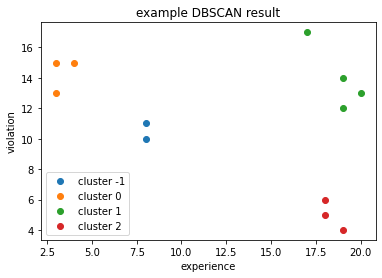

In [6]:
plot_clustering(x, db)

In [7]:
print(db.labels_ == 2)
print(~(db.labels_ == 2))

[False False False  True False False False  True False False False  True]
[ True  True  True False  True  True  True False  True  True  True False]


In [15]:
def plot_clustering_2(data, model_db):
    unique_labels = np.unique(model_db.labels_)
    core_samples_mask = np.zeros_like(model_db.labels_, dtype=bool)
    core_samples_mask[model_db.core_sample_indices_] = True
    
    for i in unique_labels:
        if i == -1:
            # 데이터 포인트가 noise로 판단될 경우, 데이터 포인트를 검정색으로 표시
            col = [1, 1, 1, 1]
        else:
            col = np.random.rand(1, 4)

        class_member_mask = (model_db.labels_ == i)
        
        

        xt = data[class_member_mask & core_samples_mask, :]
        plt.scatter(xt[:, 0], xt[:, 1], 
                    marker='o', 
                    color=col,
                    edgecolors='k', 
                    s=200)

        xt = data[class_member_mask & ~core_samples_mask, :]
        plt.scatter(xt[:, 0], xt[:, 1], 
                    marker='o', 
                    color=col, 
                    edgecolors='k', 
                    s=60)

    plt.title('example DBSCAN result')
    plt.xlabel('experience')
    plt.ylabel('violation')
    plt.show()
    return

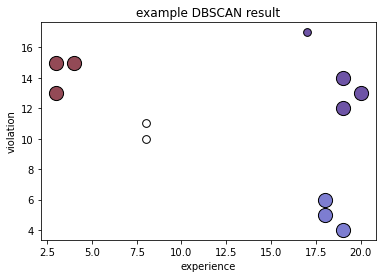

In [16]:
plot_clustering_2(x, db)

# DBSCAN 군집화가 필요한 경우

In [17]:
x_dbscan_df = pd.read_csv('Dataset/dbscan_data.csv', header=None)
x_dbscan_df.head()

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [18]:
x_dbscan = x_dbscan_df.iloc[:, 0:2].values
x_dbscan

array([[ 0.85, 17.45],
       [ 0.75, 15.6 ],
       [ 3.3 , 15.45],
       [ 5.25, 14.2 ],
       [ 4.9 , 15.65],
       [ 5.35, 15.85],
       [ 5.1 , 17.9 ],
       [ 4.6 , 18.25],
       [ 4.05, 18.75],
       [ 3.4 , 19.7 ],
       [ 2.9 , 21.15],
       [ 3.1 , 21.85],
       [ 3.9 , 21.85],
       [ 4.4 , 20.05],
       [ 7.2 , 14.5 ],
       [ 7.65, 16.5 ],
       [ 7.1 , 18.65],
       [ 7.05, 19.9 ],
       [ 5.85, 20.55],
       [ 5.5 , 21.8 ],
       [ 6.55, 21.8 ],
       [ 6.05, 22.3 ],
       [ 5.2 , 23.4 ],
       [ 4.55, 23.9 ],
       [ 5.1 , 24.4 ],
       [ 8.1 , 26.35],
       [10.15, 27.7 ],
       [ 9.75, 25.5 ],
       [ 9.2 , 21.1 ],
       [11.2 , 22.8 ],
       [12.6 , 23.1 ],
       [13.25, 23.5 ],
       [11.65, 26.85],
       [12.45, 27.55],
       [13.3 , 27.85],
       [13.7 , 27.75],
       [14.15, 26.9 ],
       [14.05, 26.55],
       [15.15, 24.2 ],
       [15.2 , 24.75],
       [12.2 , 20.9 ],
       [12.15, 21.45],
       [12.75, 22.05],
       [13.

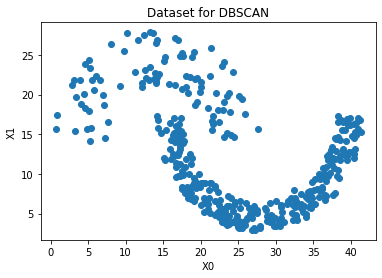

In [19]:
# 전체 데이터 plotting
plt.figure()
plt.scatter(x_dbscan[:, 0], x_dbscan[:, 1])
plt.title('Dataset for DBSCAN')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

# DBSCAN 데이터를 이용해 DBSCAN 군집 실행 및 결과 그림

### df = pd.read_csv('dbscan_data.csv', header=None)

##### * 첫 두 열만 이용할 것 (3rd column=class label)

##### * 군집 파라미터(eps, min_samples)를 정하기 위해 미리 데이터의 분포를 확인할 것 (ex. 2-d plot, statistics such as min, max, mean, std)

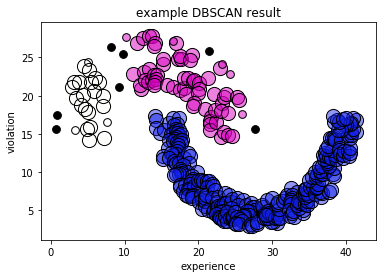

In [26]:
eps = 
min_samples = 

db = DBSCAN(eps = eps, min_samples = min_samples).fit(x_dbscan)
plot_clustering_2(x_dbscan, db)

In [28]:
eps = np.linspace(1.5, 3.5, 7)
min_samples = range(3, 8)

##########
eps: 1.5, min_samples: 3


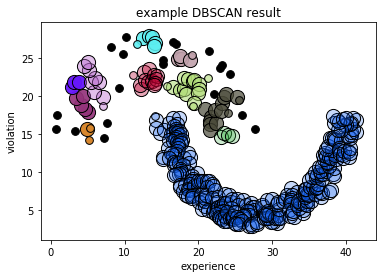

##########
eps: 1.5, min_samples: 4


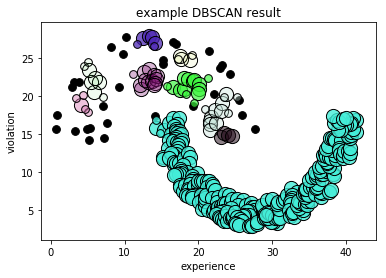

##########
eps: 1.5, min_samples: 5


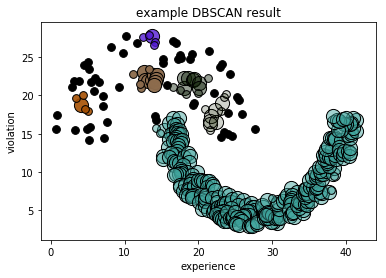

##########
eps: 1.5, min_samples: 6


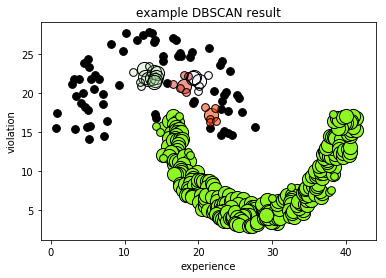

##########
eps: 1.5, min_samples: 7


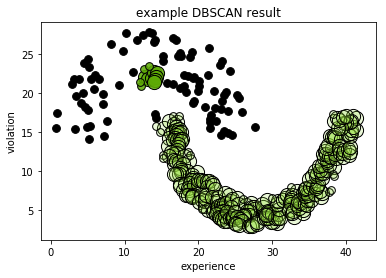

##########
eps: 1.8333333333333333, min_samples: 3


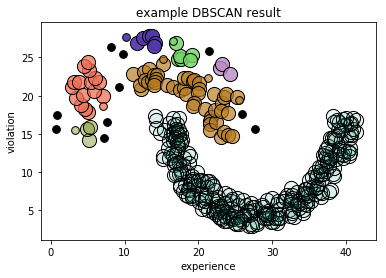

##########
eps: 1.8333333333333333, min_samples: 4


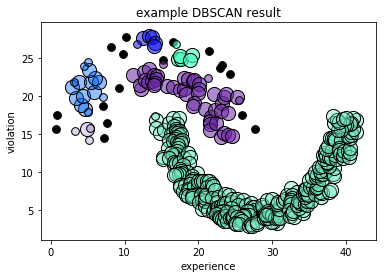

##########
eps: 1.8333333333333333, min_samples: 5


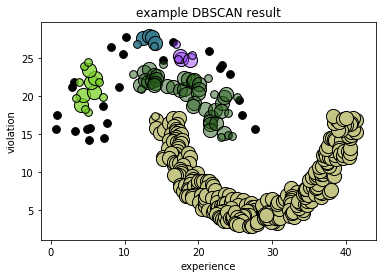

##########
eps: 1.8333333333333333, min_samples: 6


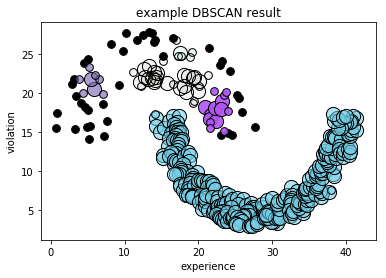

##########
eps: 1.8333333333333333, min_samples: 7


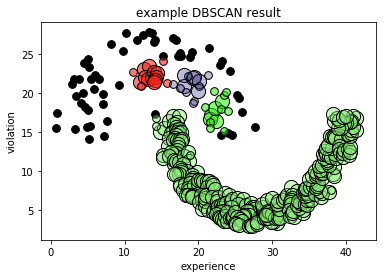

##########
eps: 2.1666666666666665, min_samples: 3


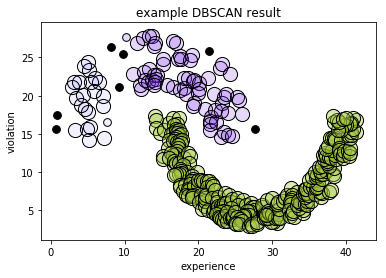

##########
eps: 2.1666666666666665, min_samples: 4


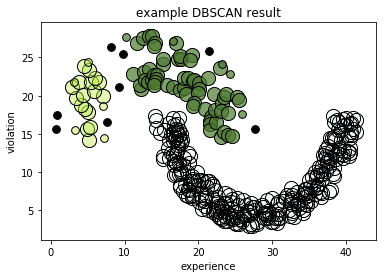

##########
eps: 2.1666666666666665, min_samples: 5


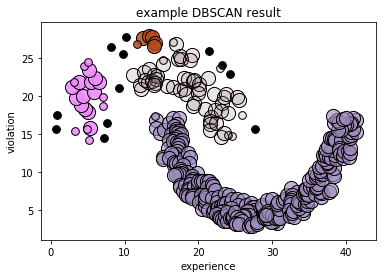

##########
eps: 2.1666666666666665, min_samples: 6


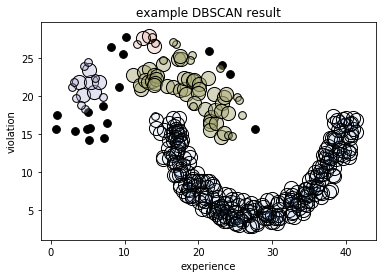

##########
eps: 2.1666666666666665, min_samples: 7


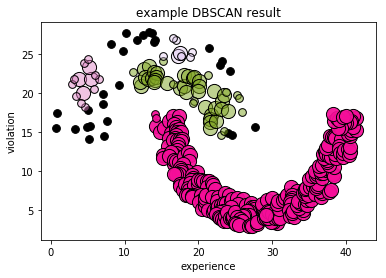

##########
eps: 2.5, min_samples: 3


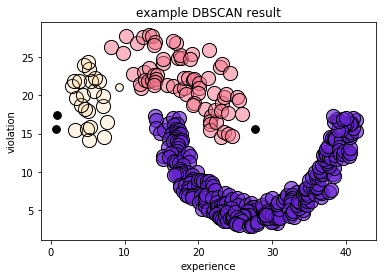

##########
eps: 2.5, min_samples: 4


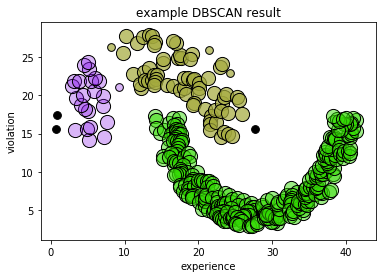

##########
eps: 2.5, min_samples: 5


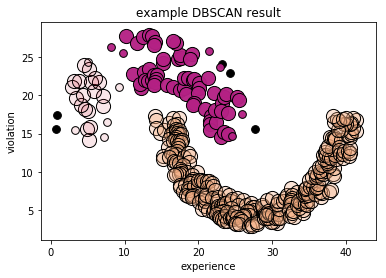

##########
eps: 2.5, min_samples: 6


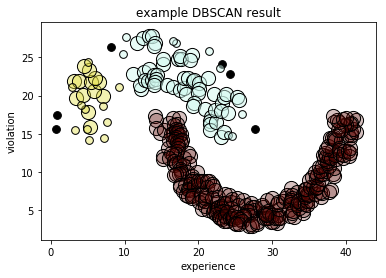

##########
eps: 2.5, min_samples: 7


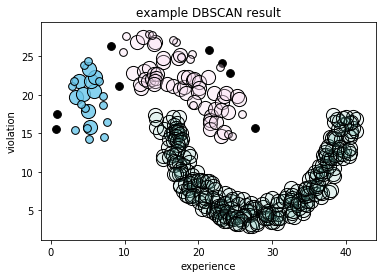

##########
eps: 2.833333333333333, min_samples: 3


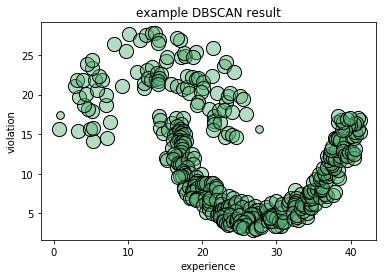

##########
eps: 2.833333333333333, min_samples: 4


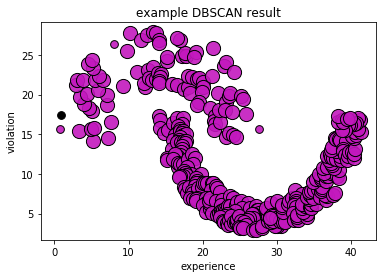

##########
eps: 2.833333333333333, min_samples: 5


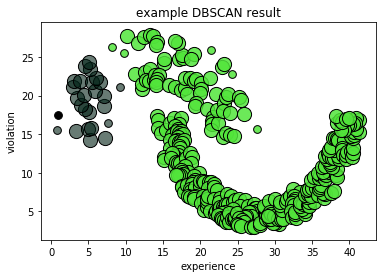

##########
eps: 2.833333333333333, min_samples: 6


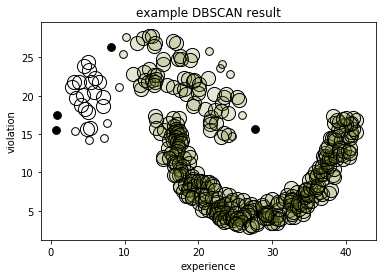

##########
eps: 2.833333333333333, min_samples: 7


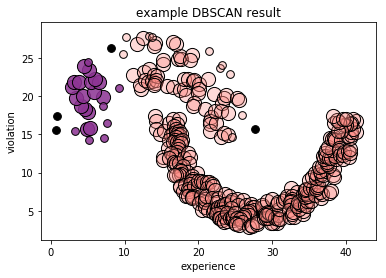

##########
eps: 3.1666666666666665, min_samples: 3


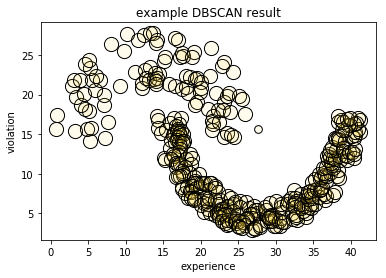

##########
eps: 3.1666666666666665, min_samples: 4


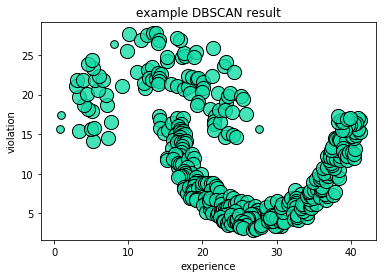

##########
eps: 3.1666666666666665, min_samples: 5


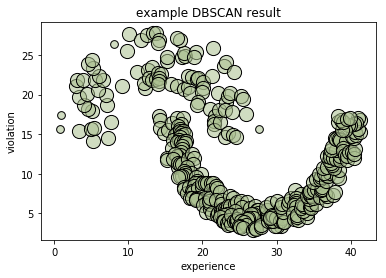

##########
eps: 3.1666666666666665, min_samples: 6


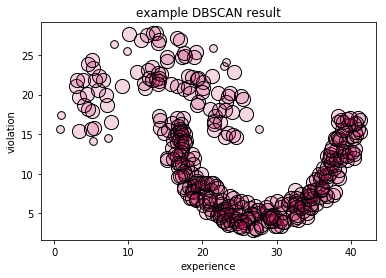

##########
eps: 3.1666666666666665, min_samples: 7


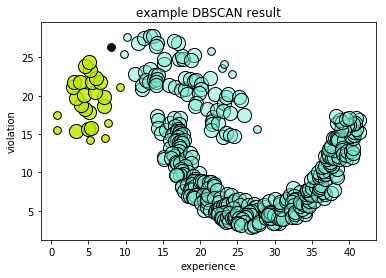

##########
eps: 3.5, min_samples: 3


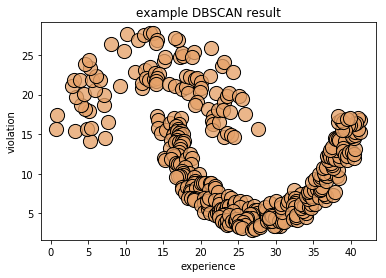

##########
eps: 3.5, min_samples: 4


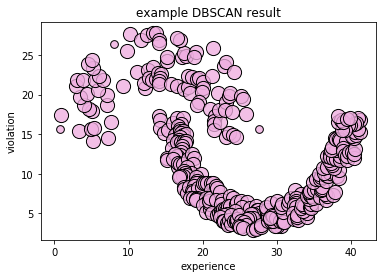

##########
eps: 3.5, min_samples: 5


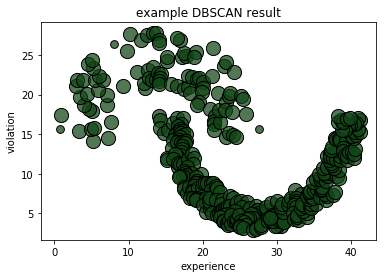

##########
eps: 3.5, min_samples: 6


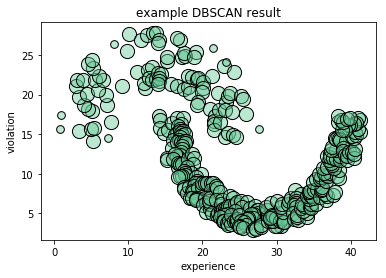

##########
eps: 3.5, min_samples: 7


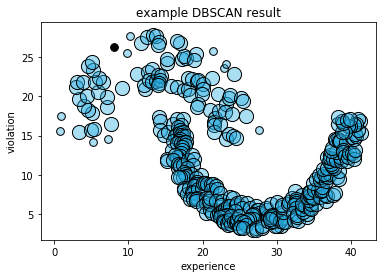

In [30]:
for i in eps:
    for j in min_samples:
        print('#'*10)
        print(f'eps: {i}, min_samples: {j}')
        db_3 = DBSCAN(eps = i, min_samples = j).fit(x_dbscan)
        plot_clustering_2(x_dbscan, db_3)